In [5]:
!pip install xgboost

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_halving_search_cv  # Enable experimental features
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [2]:
df=pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,-1.056270,-0.130759,0.121072,-1.142051,-0.424756,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,...,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869,-0.213447,-0.171381,0.469300,0
1,-0.772583,-0.130759,1.118644,0.875617,2.354292,-0.596026,-0.169194,-0.576829,2.989044,2.041734,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,-2.130831,0
2,-0.583458,-0.130759,-0.024144,0.875617,-0.424756,0.010273,-0.303898,-0.576829,2.899143,0.270124,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,-2.130831,0
3,-1.056270,-0.130759,0.017726,0.875617,2.354292,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,...,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,0.469300,0
4,1.686036,-0.130759,-0.472753,0.875617,-0.424756,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,0.469300,0


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['deposit']))  # Assuming 'deposit' is the target variable

In [5]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.30, random_state=3)

In [11]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[np.float64(0.8663169348720201), np.float64(0.8764305394721079), np.float64(0.8805324841273011), np.float64(0.8808489398235035), np.float64(0.8824332148704229), np.float64(0.8824292217386096), np.float64(0.8849558758934633), np.float64(0.8884318971369245), np.float64(0.8881164397236754), np.float64(0.8877979874615661), np.float64(0.8874825300483169), np.float64(0.8859022481332108), np.float64(0.8830571417162482), np.float64(0.8827386894541389), np.float64(0.8824252286067964), np.float64(0.8833706025635907), np.float64(0.8843209679351516), np.float64(0.8868486203729585), np.float64(0.8868486203729585), np.float64(0.8862147106976002)]


Text(0, 0.5, 'Accuracy rate')

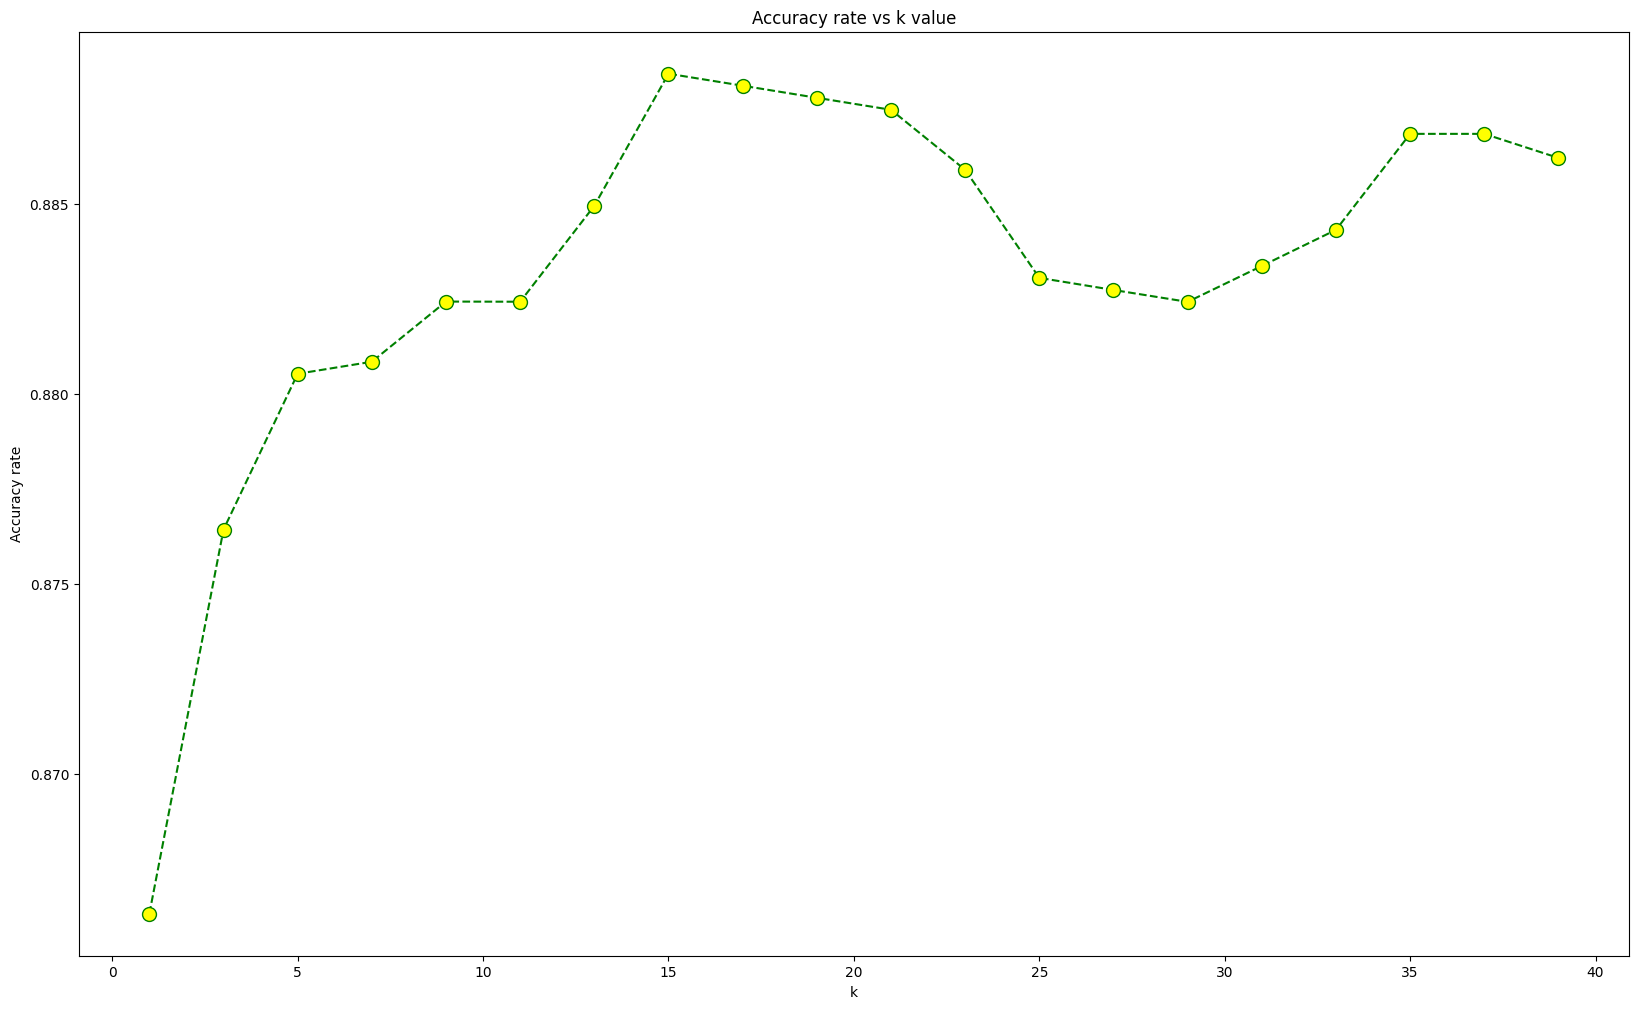

In [12]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=9

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [13]:
# TRaining KNN agaib for best value of K
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for KNN is ",aucScoreKNN)
print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)


[[1186   15]
 [ 135   21]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1201
           1       0.58      0.13      0.22       156

    accuracy                           0.89      1357
   macro avg       0.74      0.56      0.58      1357
weighted avg       0.86      0.89      0.86      1357

AUC score for KNN is  0.7884081641367237
Test Accuracy score for KNN is  0.8894620486366986
Train Accuracy score for KNN is  0.8928571428571429


In [14]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[np.float64(0.31493993993993996), np.float64(0.20262762762762768), np.float64(0.18055555555555558), np.float64(0.15075075075075076), np.float64(0.14256756756756758), np.float64(0.1316066066066066), np.float64(0.13145645645645648), np.float64(0.14234234234234236), np.float64(0.1424924924924925), np.float64(0.14504504504504503), np.float64(0.13678678678678677), np.float64(0.12575075075075076), np.float64(0.09842342342342343), np.float64(0.09564564564564565), np.float64(0.09564564564564565), np.float64(0.08746246246246248), np.float64(0.07387387387387387), np.float64(0.07665165165165166), np.float64(0.06846846846846848), np.float64(0.06013513513513513)]


Text(0, 0.5, 'Accuracy rate')

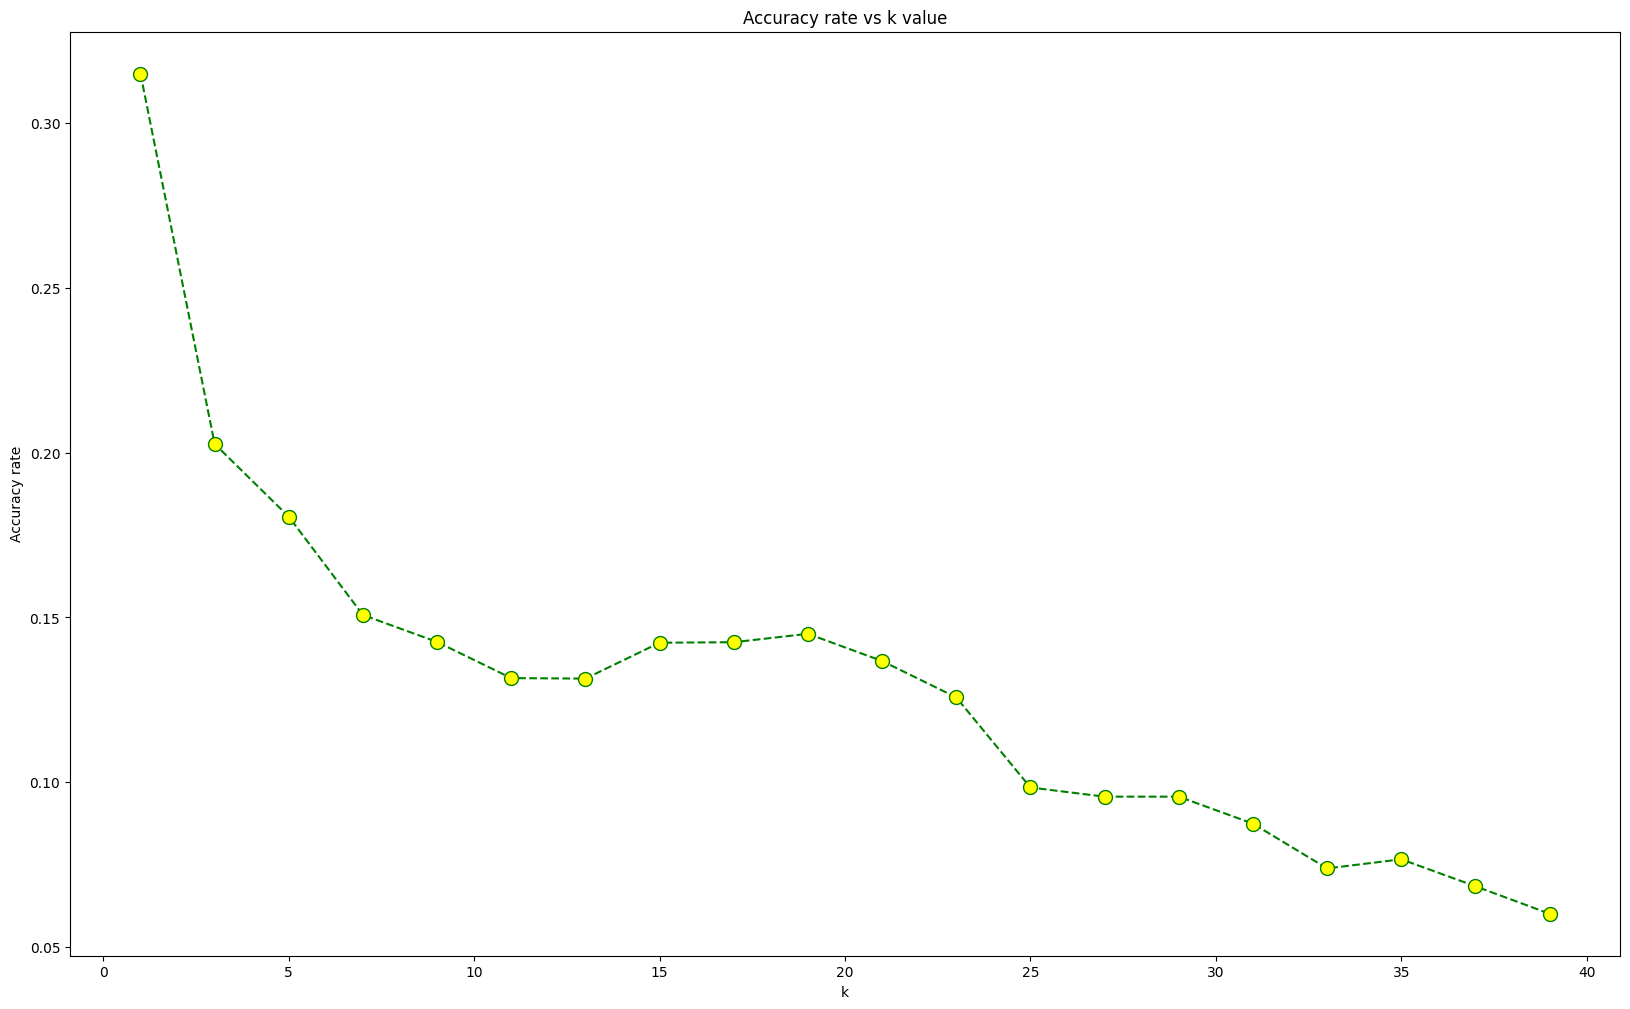

In [15]:
# plotting recall of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [16]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("Test Recall score for KNN is ",recall_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Recall score for KNN is ",recall_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)


Test Recall score for KNN is  0.33974358974358976
Train Recall score for KNN is  1.0


**Notes:**


1. KNN gives accuracy of 0.88 which is decent
2. There is not much difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.33 which is not very good

# Applying Naive Bayes

In [17]:
# Training Naive bayes
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreNB = roc_auc_score(y_test,  y_pred_prob[:,1])
fprNB, tprNB, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreNB)
print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train)
print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test, pred))

[[1079  122]
 [  87   69]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1201
           1       0.36      0.44      0.40       156

    accuracy                           0.85      1357
   macro avg       0.64      0.67      0.65      1357
weighted avg       0.86      0.85      0.85      1357

AUC score for NB is  0.7871485300710946
Test Accuracy score for NB is  0.8459837877671333
Train Accuracy score for NB is  0.8530341340075853
Recall score for NB is  0.4423076923076923


**Notes:**
1. Naive Bayes gives accuracy of 0.84 which is decent but not good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.44 which is very poor 

# Applying Logistic Regression

In [18]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 10000]
    }
]
logModel = LogisticRegression()

**Notes:**
1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

In [ ]:
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy', cv = 5 )
best_clf = clf.fit(X_train,y_train)

In [ ]:
# Training Logistic Regression
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

pred = best_clf.predict(X_test)
accLR = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreLR = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR is ",aucScoreLR)
print("Test Accuracy score for LR is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for LR is ",accuracy_score(y_train, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)


In [ ]:
# Training Logistic Regression for recall

clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall', cv = 5 )
best_clfR = clfR.fit(X_train,y_train)

In [ ]:
# print recall and best parameters

predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallLR=recall_score(y_test, predR)
print("Test Recall score for LR is ",recallLR)
print("Train recall score for LR is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR are ",best_clfR.best_params_)


**Notes:**

1.  Logistic Regression gives accuracy of 0.37 which is not good
2.  There is very less difference between train and test accuracy so its not overfitting or underfitting
3.  Recall is 0.35 which is not very good


# Logistic Regression with Polynomial Features(degree =2)

In [ ]:
# Logistic regression with polynomial features works better with normalozation instead of standardization
# so read file again

df=pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'],axis=1)
dfX=df.drop('deposit',axis=1)
df.head()

In [ ]:
# Minmaxscaler is used to normalise data

scaler = MinMaxScaler()
bankMM = scaler.fit_transform(dfX)
bankMM = pd.DataFrame(bankMM, columns=dfX.columns)
bankMM.head()

In [ ]:
# train test split (70:30)
X_train,X_test,y_train,y_test=train_test_split(bankMM,df['deposit'],test_size=0.30, random_state=3)

In [ ]:
# creating polynomial features with degree 2
poly2 = PolynomialFeatures(degree=2)
X_trainP=poly2.fit_transform(X_train)

In [ ]:
# Hyperparameters 
param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.001,0.01,0.1,1,5,25]    }

In [ ]:
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
best_clf = clf.fit(X_trainP,y_train)

In [ ]:
# create polynomial features with degree 2 for test data
X_testP=poly2.fit_transform(X_test)

In [ ]:
# Training Logistic Regression with polynomial features with degree 2
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_testP)
accLRP2 = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_testP)
aucScoreLRP2 = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLRP2, tprLRP2, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR Poly2 is ",aucScoreLRP2)
print("Test Accuracy score for LR Poly2 is ",accLRP2)
predT=best_clf.predict(X_trainP)
print("Train Accuracy score for LR Poly2 is ",accuracy_score(y_train, predT))
print("Best parameters for LR are ",best_clf.best_params_)

In [ ]:
logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
best_clfR = clfR.fit(X_trainP,y_train)

In [ ]:
# Training Logistic Regression for recall

predR = best_clfR.predict(X_testP)
predRT=best_clfR.predict(X_trainP)
recallLRP2=recall_score(y_test, predR)
print("Test Recall score for LR with polynomial features degree 2  is ",recallLRP2)
print("Train recall score for LR with polynomial features degree 2 is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR with polynomial features degree 2 are ",best_clfR.best_params_)

**Notes:**
1. Logistic regression with polynomial features degree 2 gives accuracy of 0.90 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.41 which is not good

# Logistic Regression with Polnomian Features(degree=3)

In [45]:
poly3 = PolynomialFeatures(degree=3)
X_trainP=poly3.fit_transform(X_train)

In [46]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
best_clf = clf.fit(X_trainP,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [47]:
# create polynomial features with degree 2 for test data
X_testP=poly3.fit_transform(X_test)

In [48]:
# Training Logistic Regression with polynomial features with degree 3
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix a1nd classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_testP)
accLRP3 = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_testP)
aucScoreLRP3 = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLRP3, tprLRP3, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR Poly3 is ",aucScoreLRP3)
print("Test Accuracy score for LR Poly3 is ",accLRP3)
predT=best_clf.predict(X_trainP)
print("Train Accuracy score for LR Poly3 is ",accuracy_score(y_train, predT))
print("Best parameters for LR are ",best_clf.best_params_)

[[1154   47]
 [  99   57]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1201
           1       0.55      0.37      0.44       156

    accuracy                           0.89      1357
   macro avg       0.73      0.66      0.69      1357
weighted avg       0.88      0.89      0.88      1357

AUC score for LR Poly3 is  0.858995708704285
Test Accuracy score for LR Poly3 is  0.89240972733972
Train Accuracy score for LR Poly3 is  0.9664981036662452
Best parameters for LR are  {'C': 1, 'penalty': 'l2'}


In [49]:
# Training Logistic Regression for recall

logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
best_clfR = clfR.fit(X_trainP,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [50]:
predR = best_clfR.predict(X_testP)
predRT=best_clfR.predict(X_trainP)
recallLRP3=recall_score(y_test, predR)
print("Test Recall score for LR with polynomial features degree 3  is ",recallLRP3)
print("Train recall score for LR with polynomial features degree 3 is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR with polynomial features degree 3 are ",best_clfR.best_params_)

Test Recall score for LR with polynomial features degree 3  is  0.4166666666666667
Train recall score for LR with polynomial features degree 3 is  0.9397260273972603
Best parameters for recall of LR with polynomial features degree 3 are  {'C': 25, 'penalty': 'l2'}


# Applying SVM

In [7]:
classifier = SVC(probability=True)  
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]

In [18]:
clf = HalvingGridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', factor=2, cv=3, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

In [19]:
# Training SVM
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accSVM = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreSVM = roc_auc_score(y_test,  y_pred_prob[:,1])
fprSVM, tprSVM, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for SVM is ",aucScoreSVM)
print("Test Accuracy score for SVM is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for SVM is ",accuracy_score(y_train, predT))
print("Best parameters for SVM are ",best_clf.best_params_)

[[1197    4]
 [ 154    2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1201
           1       0.33      0.01      0.02       156

    accuracy                           0.88      1357
   macro avg       0.61      0.50      0.48      1357
weighted avg       0.82      0.88      0.83      1357

AUC score for SVM is  0.7833909776041332
Test Accuracy score for SVM is  0.8835666912306559
Train Accuracy score for SVM is  1.0
Best parameters for SVM are  {'C': 100, 'gamma': 0.8, 'kernel': 'rbf'}


In [8]:
clfR = HalvingGridSearchCV(estimator=classifier, param_grid=parameters, scoring='recall', factor=2, cv=3, n_jobs=-1)
best_clfR = clfR.fit(X_train, y_train)

In [9]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallSVM=recall_score(y_test, predR)
print("Test Recall score for SVM is ",recallSVM)
print("Train recall score for SVM is ",recall_score(y_train, predRT))
print("Best parameters for recall of SVM are ",best_clfR.best_params_)

Test Recall score for SVM is  0.46153846153846156
Train recall score for SVM is  0.9972602739726028
Best parameters for recall of SVM are  {'C': 1000, 'degree': 3, 'kernel': 'poly'}


**Notes:**
1. Support vector machines gives accuracy of 0.88 which is quite good
2. There is slight difference between train and test accuracy so there is slight overfitting
3. Recall is 0.46 which is not good

# Applying Decision Tree

In [10]:
dfX=df.drop('deposit',axis=1)
dfX.head()
X_train,X_test,y_train,y_test=train_test_split(dfX,df['deposit'],test_size=0.30, random_state=3)

In [11]:
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [12]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [13]:
# Training Decision Tree
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accDT = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreDT = roc_auc_score(y_test,  y_pred_prob[:,1])
fprDT, tprDT, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Decision Tree is ",aucScoreDT)
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
print("Best parameters for DT are ",best_clf.best_params_)

[[1156   45]
 [  94   62]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1201
           1       0.58      0.40      0.47       156

    accuracy                           0.90      1357
   macro avg       0.75      0.68      0.71      1357
weighted avg       0.89      0.90      0.89      1357

AUC score for Decision Tree is  0.855849292256453
Test Accuracy score for DT is  0.8975681650700074
Train Accuracy score for DT is  0.9162452591656132
Best parameters for DT are  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [14]:
#Gridsearchcv Training Decision Tree for recall

clfR = GridSearchCV(dt,parameters,scoring='recall',verbose=True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [15]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallDT=recall_score(y_test, predR)
print("Test Recall score for DT is ",recallDT)
print("Train recall score for DT is ",recall_score(y_train, predRT))
print("Best parameters for recall of DT are ",best_clfR.best_params_)

Test Recall score for DT is  0.3974358974358974
Train recall score for DT is  0.8191780821917808
Best parameters for recall of DT are  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Notes:**
1. Decision Tree gives accuracy of 0.89 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.39 which is not good

# Applying Random Forest

rf = RandomForestClassifier()

parameters={'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 1000, 1500,  2000]}

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
parameters = {
    'n_estimators': [200, 300, 500],  
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

NameError: name 'SMOTE' is not defined

In [8]:
clf = HalvingGridSearchCV(estimator=rf, param_grid=parameters, scoring='accuracy', factor=2, cv=3, n_jobs=-1, verbose=1)
best_clf = clf.fit(X_train, y_train)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 24
max_resources_: 3164
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 144
n_resources: 24
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 1
n_candidates: 72
n_resources: 48
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 36
n_resources: 96
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 3
n_candidates: 18
n_resources: 192
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 4
n_candidates: 9
n_resources: 384
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 5
n_candidates: 5
n_resources: 768
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 3
n_resources: 1536
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 3072
Fitting

In [9]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[1179   22]
 [ 112   44]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1201
           1       0.67      0.28      0.40       156

    accuracy                           0.90      1357
   macro avg       0.79      0.63      0.67      1357
weighted avg       0.88      0.90      0.88      1357

AUC score for Random Forest is  0.9129464762270758
Test Accuracy score for Random Forest is  0.9012527634487841
Train Accuracy score for Random Forest is  1.0
Best parameters for Random Forest are  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


In [10]:
clf = HalvingGridSearchCV(estimator=rf, param_grid=parameters, scoring='recall', factor=2, cv=3, n_jobs=-1, verbose=1)
best_clf = clf.fit(X_train, y_train)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 24
max_resources_: 3164
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 144
n_resources: 24
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 1
n_candidates: 72
n_resources: 48
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 36
n_resources: 96
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 3
n_candidates: 18
n_resources: 192
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 4
n_candidates: 9
n_resources: 384
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 5
n_candidates: 5
n_resources: 768
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 3
n_resources: 1536
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 3072
Fitting

In [13]:
predR = best_clf.predict(X_test)
predRT=best_clf.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clf.best_params_)

Test Recall score for RF is  0.34615384615384615
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


**Notes:**
1. Random Forest gives accuracy of 0.84 which is quite good
2. There is quite difference between train and test accuracy but its not severe overfitting or underfitting
3. Recall is 0.88 which is very good 